Using Data Augumentation

In [1]:
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255., test_images/255.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
# Transform a single image from the dataset

test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

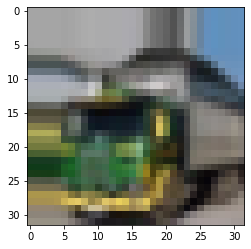

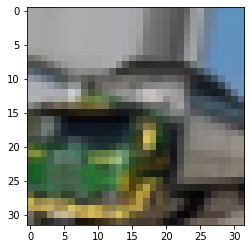

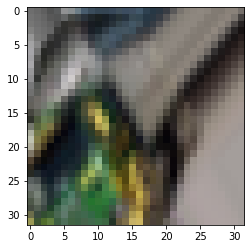

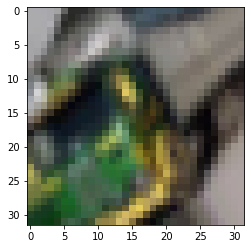

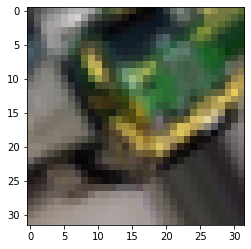

In [5]:
i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

In [6]:
n_train_images = tf.image.flip_up_down(train_images)
n_train_images2 = tf.image.flip_left_right(train_images)
n_train_images3 = tf.image.random_flip_up_down(train_images)
#n_train_images4 = tf.image.random_flip_left_right(train_images)

In [7]:
train_set = tf.concat([n_train_images, n_train_images2, n_train_images3], 0)
train_label = tf.concat([train_labels, train_labels, train_labels],0)
train_set.shape

TensorShape([150000, 32, 32, 3])

In [8]:
model = models.Sequential([
                                   tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (32, 32, 3)),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Conv2D(64, (3, 3), activation ='relu'),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(64, activation= 'relu'),
                                   tf.keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_set, train_label, epochs= 10, validation_data = (test_images, test_labels), verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4688/4688 [==============================] - 221s 47ms/step - loss: 1.4386 - accuracy: 0.4768 - val_loss: 1.2130 - val_accuracy: 0.5551
Epoch 2/10
4688/4688 [==============================] - 243s 52ms/step - loss: 1.1023 - accuracy: 0.6104 - val_loss: 1.0391 - val_accuracy: 0.6320
Epoch 3/10
4688/4688 [==============================] - 256s 55ms/step - loss: 0.9711 - accuracy: 0.6587 - val_loss: 1.0002 - val_accuracy: 0.6458
Epoch 4/10
4688/4688 [==============================] - 257s 55ms/step - loss: 0.8952 - accuracy: 0.6849 - val_loss: 0.9385 - val_accuracy: 0.6712
Epoch 5/10
4688/4688 [==============================] - 256s 55ms/step - loss: 0.8371 - accuracy: 0.7058 - val_loss: 0.9740 - val_accuracy: 0.6603
Epoch 6/10
4688/4688 [==============================] - 256s 55ms/step - loss: 0.7929 - accuracy: 0.7211 - val_loss: 0.9420 - val_accuracy: 0.6739
Epoch 7/10
4688/4688 [==============================] - 258s 55ms/step - loss: 0.7608 - accuracy: 0.7326 - val_loss: 0.9048 - val

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)
test_acc

313/313 - 4s - loss: 0.8850 - accuracy: 0.6999 - 4s/epoch - 13ms/step


0.6998999714851379

Apparently, Data Augumentation didn't have a good effect on our model's performance